<a href="https://colab.research.google.com/github/rwrobins54/Spoon-Knife/blob/main/Copy_of_Lab_1_Pandas_and_Data_Sourcing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** First Last

## **Computing ID:** ID

# Lab 1: Pandas and Data Sourcing (50 Points)
Version 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pydataset
from pydataset import data
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=594a811f82245b4110ba802217f673c1688662254a096b686abe42dff9ca21cd
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


## Part 1: Data Structure Review and Pandas Functions (20 Points)

## **Question 1 (10 points):** Read in or load a dataset as a Pandas DataFrame with at least 3 features and no more than 5. You may need to drop or filter columns in larger DataFrames. Make a single summary visual that encodes *all* the features (ie: columns) in your DataFrame. You may load your own dataset in (ie: from Kaggle), or pick from the datasets available in PyDataset already loaded below for your convenience.

For example, you could summarize a dataset with 3 features with a simple scatter plot and colors for different values in a column. You could also plot each column individually. Features like different line or point labels, plot types, color, marker shapes, and even subplots might be necessary!

In [2]:
dataset_list = data()
dataset_list

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [3]:
df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


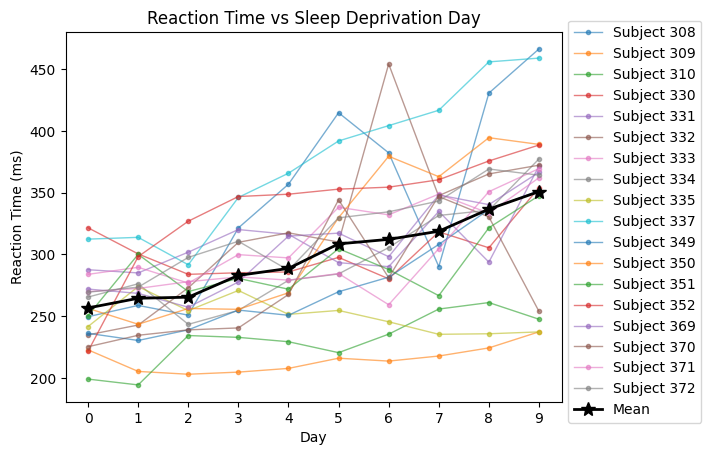

In [4]:
for Subject, group in df.groupby('Subject'):
    plt.plot(group['Days'],group['Reaction'],marker='o',markersize=3,linewidth=1,alpha=0.6,label=f'Subject {Subject}')
means = df.groupby('Days')['Reaction'].mean()
plt.plot(group['Days'],means,marker='*',linewidth=2,c='k',markersize=10,label='Mean')
plt.title('Reaction Time vs Sleep Deprivation Day')
plt.xlabel('Day')
plt.ylabel('Reaction Time (ms)')
plt.xticks(np.arange(0,10,1))
plt.legend(bbox_to_anchor=(1, 1.05))

## **Question 2 (5 points):** Use your visualization to segment the dataset into at least 3 natural groups using any form of Pandas filtering functions. Save each group's data as its own DataFrame.

In [5]:
day0 = df.Reaction[df.Days==0]
day4 = df.Reaction[df.Days==4]
day9 = df.Reaction[df.Days==9]

## **Question 3 (5 points):** Print a summary of each DataFrame including its size, shape, and descriptive statistics using the describe function. Write a few sentences in a text cell on if any relationships emerge and if the results are surprising or expected.

In [6]:
print(day0.describe(),'\n',f'shape: {day0.shape}',f'size: {day0.size}','\n')
print(day4.describe(),'\n',f'shape: {day4.shape}',f'size: {day4.size}','\n')
print(day9.describe(),'\n',f'shape: {day9.shape}',f'size: {day9.size}','\n')

count     18.000000
mean     256.651806
std       32.129451
min      199.053900
25%      235.171250
50%      253.411650
75%      271.412725
max      321.542600
Name: Reaction, dtype: float64 
 shape: (18,) size: 18 

count     18.000000
mean     288.649422
std       42.537887
min      207.716100
25%      267.882100
50%      282.483900
75%      315.913525
max      365.732400
Name: Reaction, dtype: float64 
 shape: (18,) size: 18 

count     18.000000
mean     350.851222
std       66.986155
min      237.246600
25%      348.585400
50%      365.318350
75%      376.031450
max      466.353500
Name: Reaction, dtype: float64 
 shape: (18,) size: 18 



The intention behind filtering days 0, 4, and 9 was to get a basic picture of how reaction time changes through increasing periods of sleep deprivation without any in-depth analases of the entire time frame. As expected, the counts are all the same at each day because there were 18 participants from whom the entire 9 days of data were collected. The most conclusive data are the means; at day 0, the mean is the lowest, and at day 9 the mean is the highest, with day 4 in the middle. This makes sense because you may expect to find that an individual's reaction time gets slower (higher) as they become increasingly sleep deprived which is, at least at a glance, what we see with the means. Another interesting comparison is the standard deviations. The standard deviations also increase from day 0 to day 4 to day 9, indicating that there may be more individual variability in reaction times as participants are increasingly sleep deprived, suggesting that sleep deprivaiton may have been affecting the participants differently.

## Part 2: Getting Data From APIs and Web Scraping (30 points)
A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

In the 2nd part of this lab, you will choose from utilizing a simple API for getting and analyzing data through a variety of queries or web scraping a page.

**Web Scraping Examples**
* Any Wikipedia page
  * https://en.wikipedia.org/wiki/Capybara  
  * https://en.m.wikipedia.org/wiki/List_of_common_misconceptions
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape


**API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.



## **Question 1 (5 points):** Pick a URL (several examples are above) to either web scrape data from OR query using an API (no need to do both). Download your initial raw data using the `requests` package and store it in a variable.

## Print your variable. Observe what kind of data your API or website can produce and design a DataFrame of at least 1 column you would like to create. Write the feature(s) you plan on obtaining below.



### **URL Chosen:** https://pokeapi.co/api/v2/move/

### **API or Web Scraping:** API

### **DataFrame Column(s):** Characteristics of Various Pokemon Moves

In [3]:
url = 'https://pokeapi.co/api/v2/move/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
import requests
response = requests.get(url, headers=headers)
response

<Response [200]>

## **Question 2 (10 points):**
## Create the DataFrame of your selected feature(s). Whether using an API or scraping, you might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data!



In [6]:
pokemove = response.json()
pokemovedf = pd.DataFrame(pokemove['results'])
pokemovedf.head()

,name,url
0,pound,https://pokeapi.co/api/v2/move/1/
1,karate-chop,https://pokeapi.co/api/v2/move/2/
2,double-slap,https://pokeapi.co/api/v2/move/3/
3,comet-punch,https://pokeapi.co/api/v2/move/4/
4,mega-punch,https://pokeapi.co/api/v2/move/5/


In [7]:
urllist = pokemovedf.url.tolist()
movedata = []
for link in urllist:
  print(link)
  newresponse = requests.get(link, headers=headers)
  movedict = newresponse.json()
  movedata.append(movedict)
  time.sleep(2)

https://pokeapi.co/api/v2/move/1/
https://pokeapi.co/api/v2/move/2/
https://pokeapi.co/api/v2/move/3/
https://pokeapi.co/api/v2/move/4/
https://pokeapi.co/api/v2/move/5/
https://pokeapi.co/api/v2/move/6/
https://pokeapi.co/api/v2/move/7/
https://pokeapi.co/api/v2/move/8/
https://pokeapi.co/api/v2/move/9/
https://pokeapi.co/api/v2/move/10/
https://pokeapi.co/api/v2/move/11/
https://pokeapi.co/api/v2/move/12/
https://pokeapi.co/api/v2/move/13/
https://pokeapi.co/api/v2/move/14/
https://pokeapi.co/api/v2/move/15/
https://pokeapi.co/api/v2/move/16/
https://pokeapi.co/api/v2/move/17/
https://pokeapi.co/api/v2/move/18/
https://pokeapi.co/api/v2/move/19/
https://pokeapi.co/api/v2/move/20/


In [8]:
movedatadf = pd.DataFrame(movedata)
movedatadf

,accuracy,contest_combos,contest_effect,contest_type,damage_class,effect_chance,effect_changes,effect_entries,flavor_text_entries,generation,...,name,names,past_values,power,pp,priority,stat_changes,super_contest_effect,target,type
0,100.0,"{'normal': {'use_after': None, 'use_before': [{'name': 'double-slap', 'url': 'https://...",{'url': 'https://pokeapi.co/api/v2/contest-effect/1/'},"{'name': 'tough', 'url': 'https://pokeapi.co/api/v2/contest-type/5/'}","{'name': 'physical', 'url': 'https://pokeapi.co/api/v2/move-damage-class/2/'}",NaN,[],"[{'effect': 'Inflicts regular damage.', 'language': {'name': 'en', 'url': 'https://pok...","[{'flavor_text': 'Pounds with fore­ legs or tail.', 'language': {'name': 'en', 'url': ...","{'name': 'generation-i', 'url': 'https://pokeapi.co/api/v2/generation/1/'}",...,pound,"[{'language': {'name': 'ja-Hrkt', 'url': 'https://pokeapi.co/api/v2/language/1/'}, 'na...",[],40.0,35,0,[],{'url': 'https://pokeapi.co/api/v2/super-contest-effect/5/'},"{'name': 'selected-pokemon', 'url': 'https://pokeapi.co/api/v2/move-target/10/'}","{'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}"
1,100.0,"{'normal': {'use_after': [{'name': 'focus-energy', 'url': 'https://pokeapi.co/api/v2/m...",{'url': 'https://pokeapi.co/api/v2/contest-effect/2/'},"{'name': 'tough', 'url': 'https://pokeapi.co/api/v2/contest-type/5/'}","{'name': 'physical', 'url': 'https://pokeapi.co/api/v2/move-damage-class/2/'}",NaN,[],[{'effect': 'Inflicts regular damage. User's critical hit rate is one level higher wh...,"[{'flavor_text': 'Has a high criti­ cal hit ratio.', 'language': {'name': 'en', 'url':...","{'name': 'generation-i', 'url': 'https://pokeapi.co/api/v2/generation/1/'}",...,karate-chop,"[{'language': {'name': 'ja-Hrkt', 'url': 'https://pokeapi.co/api/v2/language/1/'}, 'na...","[{'accuracy': None, 'effect_chance': None, 'effect_entries': [], 'power': None, 'pp': ...",50.0,25,0,[],{'url': 'https://pokeapi.co/api/v2/super-contest-effect/5/'},"{'name': 'selected-pokemon', 'url': 'https://pokeapi.co/api/v2/move-target/10/'}","{'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}"
2,85.0,"{'normal': {'use_after': [{'name': 'pound', 'url': 'https://pokeapi.co/api/v2/move/1/'...",{'url': 'https://pokeapi.co/api/v2/contest-effect/10/'},"{'name': 'tough', 'url': 'https://pokeapi.co/api/v2/contest-type/5/'}","{'name': 'physical', 'url': 'https://pokeapi.co/api/v2/move-damage-class/2/'}",NaN,[],[{'effect': 'Inflicts regular damage. Hits 2–5 times in one turn. Has a 3/8 chance e...,"[{'flavor_text': 'Repeatedly slaps 2-5 times.', 'language': {'name': 'en', 'url': 'htt...","{'name': 'generation-i', 'url': 'https://pokeapi.co/api/v2/generation/1/'}",...,double-slap,"[{'language': {'name': 'ja-Hrkt', 'url': 'https://pokeapi.co/api/v2/language/1/'}, 'na...",[],15.0,10,0,[],{'url': 'https://pokeapi.co/api/v2/super-contest-effect/7/'},"{'name': 'selected-pokemon', 'url': 'https://pokeapi.co/api/v2/move-target/10/'}","{'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}"
3,85.0,None,{'url': 'https://pokeapi.co/api/v2/contest-effect/12/'},"{'name': 'tough', 'url': 'https://pokeapi.co/api/v2/contest-type/5/'}","{'name': 'physical', 'url': 'https://pokeapi.co/api/v2/move-damage-class/2/'}",NaN,[],[{'effect': 'Inflicts regular damage. Hits 2–5 times in one turn. Has a 3/8 chance e...,"[{'flavor_text': 'Repeatedly punches 2-5 times.', 'language': {'name': 'en', 'url': 'h...","{'name': 'generation-i', 'url': 'https://pokeapi.co/api/v2/generation/1/'}",...,comet-punch,"[{'language': {'name': 'ja-Hrkt', 'url': 'https://pokeapi.co/api/v2/language/1/'}, 'na...",[],18.0,15,0,[],{'url': 'https://pokeapi.co/api/v2/super-contest-effect/7/'},"{'name': 'selected-pokemon', 'url': 'https://pokeapi.co/api/v2/move-target/10/'}","{'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}"
4,85.0,"{'normal': {'use_after': [{'name': 'focus-energy', 'url': 'https://pokeapi.co/api/v2/m...",{'url': 'https://pokeapi.co/api/v2/contest-effect/

## **Question 3 (15 points):** Perform an exploratory analysis on the DataFrame you've created, making modifications to it as necessary. Some example features to explore include:
* If you've scraped text data, plot a few rows of data
* If you've scraped any image URLs, plot a few of them
* If you've scraped any image URLs, add a column for file extension type
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, write down 1 to 2 sentences about any interestings aspects of your data (group characteristics, clear relationships between variables) or your process of getting it.

([<matplotlib.axis.XTick at 0x7d90efe67410>,
 [Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100')])

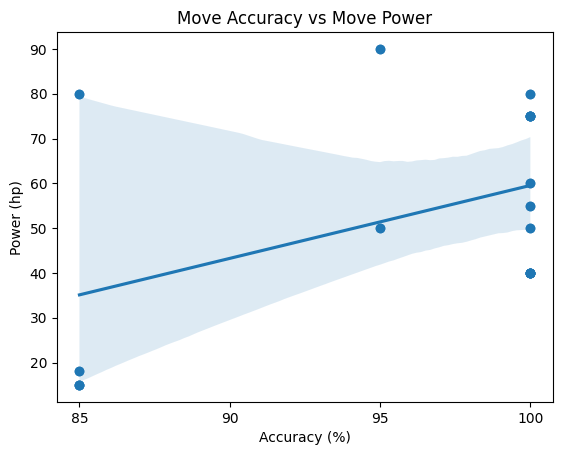

In [9]:
plt.scatter(movedatadf.accuracy,movedatadf.power)
plt.title('Move Accuracy vs Move Power')
sns.regplot(x=movedatadf.accuracy, y=movedatadf.power, scatter=True)
plt.xlabel('Accuracy (%)')
plt.ylabel('Power (hp)')
plt.xticks(np.arange(85,105,5))

In [24]:
effects = movedatadf.effect_chance.notna().sum()
effectchance = movedatadf.effect_chance.unique()

print(effects)
print(effectchance)

4
[ nan  10. 100.]


In [12]:
punchcount = movedatadf.stack().str.contains("punch").sum()
print(punchcount)

5

In [28]:
movedatacleaned = movedatadf.loc[:, ~movedatadf.applymap(type).eq(dict).any()]
movedatacleaned = movedatacleaned.loc[:, ~movedatadf.applymap(type).eq(list).any()]
movedatacleaned

<ipython-input-28-0db6eaf9244b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movedatacleaned = movedatadf.loc[:, ~movedatadf.applymap(type).eq(dict).any()]
<ipython-input-28-0db6eaf9244b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movedatacleaned = movedatacleaned.loc[:, ~movedatadf.applymap(type).eq(list).any()]


,accuracy,effect_chance,id,name,power,pp,priority
0,100.0,NaN,1,pound,40.0,35,0
1,100.0,NaN,2,karate-chop,50.0,25,0
2,85.0,NaN,3,double-slap,15.0,10,0
3,85.0,NaN,4,comet-punch,18.0,15,0
4,85.0,NaN,5,mega-punch,80.0,20,0
5,100.0,NaN,6,pay-day,40.0,20,0
6,100.0,10.0,7,fire-punch,75.0,15,0
7,100.0,10.0,8,ice-punch,75.0,15,0
8,100.0,10.0,9,thunder-punch,75.0,15,0
9,100.0,NaN,10,scratch,40.0,35,0


First, I decided to plot the pokemon moves' power vs their accuracy. I expected that as accuracy increased, power might decrease to balance the chance of a big hit. However, this was not the case. By adding a trendline I found that higher accuracy is typically associated with greater power. This may be due to the fact that some lower powered moves come with other effects that are obscured by this plot in particular. It also may be due to the limited size of the dataframe, limited statistical power, and many other confounding characteristics of each move. I was curious exactly how many had special effects and the probabilities of each of such effects. There turned out to be four moves with the probability of each effect landing being limited  to either 10% or 100%. Lastly and unrelatedly, I noticed that many moves had the word "punch" in the name, so I decided to count how many exactly. There are 5. Lastly, since I was not using any of the columns with additional data (stored in dictionaries & lists that would require additional API calls), I cleaned out these columns to leave only the data I was using. It looks much nicer and more approachable this way.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.